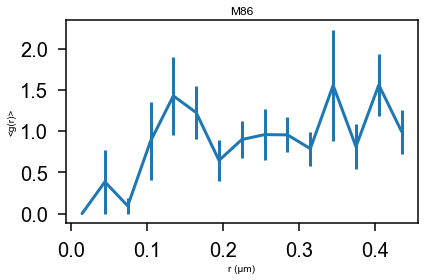

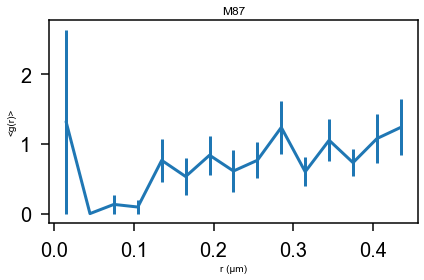

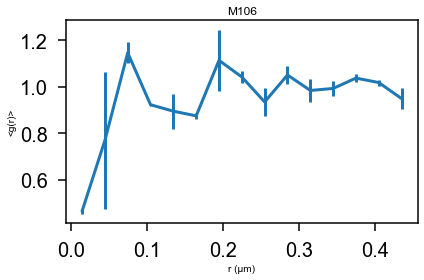

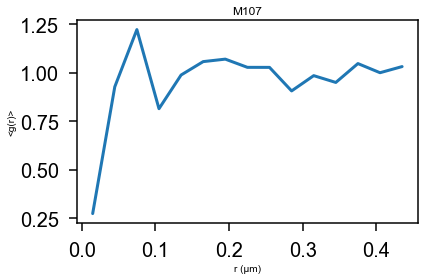

In [90]:
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import freud.box
from freud import box, density
from scipy import stats
%matplotlib inline
sample_names = ["M86","M87","M106","M107"]
bins = 15
r_max = .45
param_dict = {
    "M86": {"sheet_name": "M86 RDS.xlsx", "box_size": 2},
    "M87": {"sheet_name": "M87 RDS.xlsx", "box_size": 2},
    "M107": {"sheet_name": "M107 RDS.xlsx", "box_size": 1},
    "M106": {"sheet_name": "M106 RDS.xlsx", "box_size": 1},

}

for sample_name in sample_names:
    sample_data = xlrd.open_workbook(param_dict[sample_name]["sheet_name"])
    bin_counts = []
    for sheet  in sample_data.sheets():
        L = param_dict[sample_name]["box_size"]
        #box = freud.box.Box(5, 5, is2D=True)
        box = freud.box.Box(L, L, is2D=True)
        box.periodic = [True, True, False]
        coordinate_array = [[sheet.cell_value(r,c) for c in range(sheet.ncols)] for r in range(sheet.nrows)]
        coordinates = np.array(coordinate_array)
        assert np.max(coordinates) <= L
        coordinates-=[L/2,L/2,0]
        rdf = freud.density.RDF(bins, r_max, normalize=True)
        rdf.compute(system=(box, coordinates), reset=True)
        bin_counts.append(rdf.rdf)
    bin_counts = np.asarray(bin_counts)
    mean_count = np.mean(bin_counts,axis=0)
    sem =  stats.sem(bin_counts, axis=0, ddof=1)
    plt.errorbar(rdf.bin_centers, mean_count, yerr=sem)
    plt.title(sample_name)
    plt.xlabel("r (μm)")
    plt.ylabel("<g(r)>")
    plt.show()
    np.savetxt(sample_name+".csv",(rdf.bin_centers,mean_count,sem),delimiter=',')
    
    #np.savetxt(sample_name+".csv",